# Car Evaluation
### Source
Creator:

Marko Bohanec

Donors:

1. Marko Bohanec (marko.bohanec '@' ijs.si)
2. Blaz Zupan (blaz.zupan '@' ijs.si)

### Data Set Information:
Car Evaluation Database was derived from a simple hierarchical decision model originally developed for the demonstration of DEX, M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica 1(1), pp. 145-157, 1990.). The model evaluates cars according to the following concept structure:

CAR car acceptability
. PRICE overall price
. . buying buying price
. . maint price of the maintenance
. TECH technical characteristics
. . COMFORT comfort
. . . doors number of doors
. . . persons capacity in terms of persons to carry
. . . lug_boot the size of luggage boot
. . safety estimated safety of the car

Input attributes are printed in lowercase. Besides the target concept (CAR), the model includes three intermediate concepts: PRICE, TECH, COMFORT. Every concept is in the original model related to its lower level descendants by a set of examples (for these examples sets see [Web Link]).

The Car Evaluation Database contains examples with the structural information removed, i.e., directly relates CAR to the six input attributes: buying, maint, doors, persons, lug_boot, safety.

Because of known underlying concept structure, this database may be particularly useful for testing constructive induction and structure discovery methods.

### Attribute Information:

Class Values:

unacc, acc, good, vgood

Attributes:

buying: vhigh, high, med, low.

maint: vhigh, high, med, low.

doors: 2, 3, 4, 5more.

persons: 2, 4, more.

lug_boot: small, med, big.

safety: low, med, high.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import Pool, CatBoostClassifier, cv, CatBoostRegressor

## Loading the Datasets

In [3]:
data=pd.read_csv('C:\\Users\\Sourav\\Desktop\\Sourav Karmakar\\car.data',header=None)

In [4]:
data

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


## Giving the column name

In [5]:
data =data.set_axis(['buying', 'maint', 'doors', 'persons', 'lug_boot','safety','Class_Values'], axis=1, inplace=False)


In [6]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,Class_Values
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [7]:
data.describe()

,buying,maint,doors,persons,lug_boot,safety,Class_Values
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,low,low,2,2,big,low,unacc
freq,432,432,432,576,576,576,1210


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying          1728 non-null object
maint           1728 non-null object
doors           1728 non-null object
persons         1728 non-null object
lug_boot        1728 non-null object
safety          1728 non-null object
Class_Values    1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


## Information about the columns

In [8]:
data['buying'].value_counts()

vhigh    432
med      432
high     432
low      432
Name: buying, dtype: int64

In [9]:
data['persons'].value_counts()

2       576
more    576
4       576
Name: persons, dtype: int64

In [10]:
data['doors'].value_counts()

3        432
2        432
5more    432
4        432
Name: doors, dtype: int64

## Changing the string to numbers

In [11]:
data['doors'].replace('5more', 5, inplace = True)

data['doors'].value_counts()

3    432
2    432
4    432
5    432
Name: doors, dtype: int64

## Changing the string to number

In [12]:
data['persons'].replace('more', 5, inplace = True)

data['persons'].value_counts()

2    576
4    576
5    576
Name: persons, dtype: int64

In [13]:
data['maint'].value_counts()

vhigh    432
med      432
high     432
low      432
Name: maint, dtype: int64

In [14]:
data['lug_boot'].value_counts()

med      576
big      576
small    576
Name: lug_boot, dtype: int64

In [15]:
data['safety'].value_counts()

med     576
high    576
low     576
Name: safety, dtype: int64

In [16]:
data['Class_Values'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: Class_Values, dtype: int64

## Checking the null value in any column

In [17]:
data.isnull().any()

buying          False
maint           False
doors           False
persons         False
lug_boot        False
safety          False
Class_Values    False
dtype: bool

## Data Visualisation

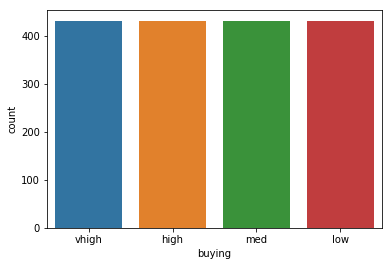

In [18]:
sns.countplot('buying',data=data)

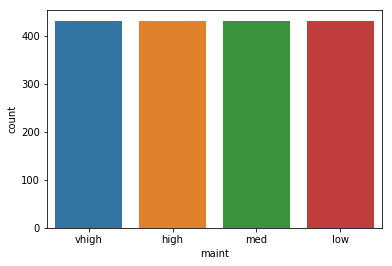

In [19]:
sns.countplot('maint',data=data)

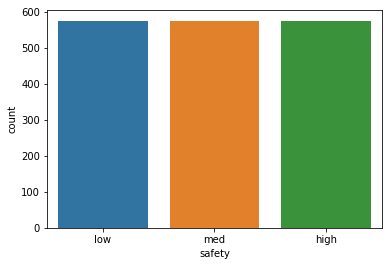

In [20]:
sns.countplot('safety',data=data)

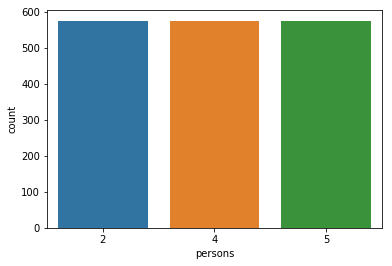

In [21]:
sns.countplot('persons',data=data)

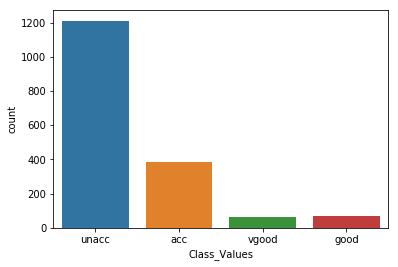

In [22]:
sns.countplot('Class_Values',data=data)

## Label Encoding of Buying column

In [23]:
data['buying'].replace(('high', 'med', 'vhigh', 'low'), (0, 1, 2, 3), inplace = True)
data['buying'].value_counts()

3    432
2    432
1    432
0    432
Name: buying, dtype: int64

## Label Encoding of maint column

In [24]:
data['maint'].replace(('high', 'med', 'vhigh', 'low'), (0, 1, 2, 3), inplace = True)
data['maint'].value_counts()

3    432
2    432
1    432
0    432
Name: maint, dtype: int64

## Label Encoding of Lug_Boot

In [25]:
data['lug_boot'].replace(('big', 'small', 'med'), (0, 1, 2), inplace = True)
data['lug_boot'].value_counts()

2    576
1    576
0    576
Name: lug_boot, dtype: int64

## Label Encoding of Safety

In [26]:
data['safety'].replace(('high', 'med','low'), (0, 1, 2), inplace = True)
data['safety'].value_counts()

2    576
1    576
0    576
Name: safety, dtype: int64

## Label Encoding of Class Values

In [27]:
data['Class_Values'].replace(('unacc', 'acc', 'good', 'vgood'), (0, 1, 2, 3), inplace = True)
data['Class_Values'].value_counts()

0    1210
1     384
2      69
3      65
Name: Class_Values, dtype: int64

## Spliting the explanatory,response variable

In [28]:
X = data.iloc[:,:6]
y = data.iloc[:, 6]

print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (1728, 6)
Shape of y:  (1728,)


## Splitting the data

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.20,shuffle=True)

In [30]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1557,3,1,3,5,1,2
108,2,0,2,2,1,2
887,1,2,2,5,2,0
411,2,3,5,2,0,2
1111,1,1,3,2,2,1


In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1382 entries, 1557 to 949
Data columns (total 6 columns):
buying      1382 non-null int64
maint       1382 non-null int64
doors       1382 non-null object
persons     1382 non-null object
lug_boot    1382 non-null int64
safety      1382 non-null int64
dtypes: int64(4), object(2)
memory usage: 75.6+ KB


In [32]:
X_train['buying'].value_counts()

0    352
3    348
1    342
2    340
Name: buying, dtype: int64

In [33]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346 entries, 466 to 1140
Data columns (total 6 columns):
buying      346 non-null int64
maint       346 non-null int64
doors       346 non-null object
persons     346 non-null object
lug_boot    346 non-null int64
safety      346 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.9+ KB


In [34]:
y_train.shape

(1382,)

## Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

model =LogisticRegression(solver='lbfgs' ,multi_class='ovr')
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

## Confusion Matrix

In [36]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)
cm

array([[219,  27,   0,   0],
       [ 31,  44,   1,   1],
       [  7,   7,   0,   0],
       [  0,   9,   0,   0]], dtype=int64)

## Accuracy of Logistic Regression

In [76]:
print("Accuracy of the model is {}".format(np.trace(cm)/np.sum(cm)*100))

Accuracy of the model is 76.01156069364163


In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       246
           1       0.51      0.57      0.54        77
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00         9

   micro avg       0.76      0.76      0.76       346
   macro avg       0.34      0.37      0.35       346
weighted avg       0.72      0.76      0.74       346



## SVM

In [40]:
from sklearn.svm import SVC

In [41]:
sv= SVC(kernel='poly' ,degree=3)

In [42]:
sv.fit(X_train,y_train)

C:\Users\Sourav\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

## Confusion Matrix

In [79]:
y_sv=sv.predict(X_test)

In [80]:
cm2= confusion_matrix(y_test,y_sv)

cm2

array([[213,  32,   0,   1],
       [ 22,  50,   2,   3],
       [  1,  10,   3,   0],
       [  1,   4,   0,   4]], dtype=int64)

## Accuracy of SVM

In [81]:
print("Accuracy of the model in test  {}".format(np.trace(cm2)/np.sum(cm2)*100))

Accuracy of the model in test  78.03468208092485


In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_sv))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       246
           1       0.52      0.65      0.58        77
           2       0.60      0.21      0.32        14
           3       0.50      0.44      0.47         9

   micro avg       0.78      0.78      0.78       346
   macro avg       0.63      0.54      0.56       346
weighted avg       0.79      0.78      0.78       346



## Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf= RandomForestClassifier(n_estimators= 100)

rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [48]:
y_rf= rf.predict(X_test)

## Confusion Matrix

In [49]:
cm3= confusion_matrix(y_test,y_rf)

cm3

array([[239,   7,   0,   0],
       [  2,  74,   1,   0],
       [  0,   5,   9,   0],
       [  0,   2,   0,   7]], dtype=int64)

## Accuracy of the Random Forest

In [69]:
print("Accuracy of the model in test  {}".format(np.trace(cm3)/np.sum(cm3)*100))

Accuracy of the model in test  95.08670520231213


In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_rf))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       246
           1       0.84      0.96      0.90        77
           2       0.90      0.64      0.75        14
           3       1.00      0.78      0.88         9

   micro avg       0.95      0.95      0.95       346
   macro avg       0.93      0.84      0.88       346
weighted avg       0.95      0.95      0.95       346



## Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
dt= DecisionTreeClassifier()

In [53]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [54]:
y_dt=dt.predict(X_test)

## Confusion Matrix

In [55]:
cm4= confusion_matrix(y_test,y_dt)

cm4

array([[237,   9,   0,   0],
       [  7,  67,   2,   1],
       [  1,   2,  10,   1],
       [  0,   0,   0,   9]], dtype=int64)

## Accuracy of Decision Tree

In [70]:
print("Accuracy of the model in test  {}".format(np.trace(cm4)/np.sum(cm4)*100))

Accuracy of the model in test  93.35260115606935


In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_dt))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       246
           1       0.86      0.87      0.86        77
           2       0.83      0.71      0.77        14
           3       0.82      1.00      0.90         9

   micro avg       0.93      0.93      0.93       346
   macro avg       0.87      0.89      0.87       346
weighted avg       0.93      0.93      0.93       346



## CatBoost

In [65]:
model = CatBoostClassifier(verbose=False, loss_function='MultiClass')

In [66]:
model.fit(X_train,y_train )

In [67]:
y_cat=model.predict(X_test)

## Confusion Matrix

In [72]:
cm5= confusion_matrix(y_test,y_cat)

cm5

array([[244,   2,   0,   0],
       [  0,  75,   2,   0],
       [  0,   0,  14,   0],
       [  0,   0,   0,   9]], dtype=int64)

## Accuracy of Catboost

In [73]:
print("Accuracy of the model in test  {}".format(np.trace(cm5)/np.sum(cm5)*100))

Accuracy of the model in test  98.84393063583815


In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_cat))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       246
           1       0.97      0.97      0.97        77
           2       0.88      1.00      0.93        14
           3       1.00      1.00      1.00         9

   micro avg       0.99      0.99      0.99       346
   macro avg       0.96      0.99      0.98       346
weighted avg       0.99      0.99      0.99       346

